In [10]:
import sys
sys.path.append('../')
from data_loader import DataLoader
import random
import configparser
from feature_selector import BaselineSelector, AnalysisSelector
from feature_selector import FeatureExtractor
import numpy as np
from utils import parse_config_features
import pandas as pd 

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [12]:
X = pd.read_csv(config['Data']['features_path'])
y = np.load(config['Data']['labels_path'])

In [13]:
X.columns

Index(['Unnamed: 0', 'skewness_alpha_0', 'skewness_alpha_1',
       'skewness_alpha_2', 'skewness_alpha_3', 'skewness_alpha_4',
       'skewness_alpha_5', 'skewness_alpha_6', 'skewness_alpha_7',
       'skewness_alpha_8',
       ...
       'hjorth_complexity_theta_9', 'hjorth_complexity_theta_10',
       'hjorth_complexity_theta_11', 'hjorth_complexity_theta_12',
       'hjorth_complexity_theta_13', 'hjorth_complexity_theta_14',
       'hjorth_complexity_theta_15', 'hjorth_complexity_theta_16',
       'hjorth_complexity_theta_17', 'hjorth_complexity_theta_18'],
      dtype='object', length=476)

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)

In [16]:
print(mutual_info_series.index[:30])

Index(['hjorth_activity_alpha_9', 'hjorth_activity_alpha_14',
       'hjorth_activity_beta_9', 'hjorth_activity_alpha_8',
       'hjorth_complexity_alpha_9', 'hjorth_activity_beta_14',
       'hjorth_complexity_alpha_8', 'hjorth_complexity_alpha_14',
       'hjorth_activity_beta_8', 'hjorth_activity_alpha_6',
       'hjorth_activity_alpha_15', 'hjorth_activity_beta_12',
       'hjorth_complexity_alpha_15', 'hjorth_activity_beta_6',
       'hjorth_activity_beta_15', 'hjorth_complexity_alpha_6',
       'hjorth_activity_alpha_18', 'hjorth_complexity_alpha_18',
       'hjorth_complexity_alpha_7', 'hjorth_activity_beta_18',
       'hjorth_activity_beta_13', 'hjorth_activity_beta_7',
       'hjorth_activity_alpha_7', 'hjorth_activity_beta_1',
       'hjorth_activity_gamma_0', 'hjorth_activity_beta_0',
       'hjorth_activity_gamma_11', 'hjorth_complexity_alpha_1',
       'hjorth_activity_alpha_16', 'hjorth_activity_gamma_12'],
      dtype='object')


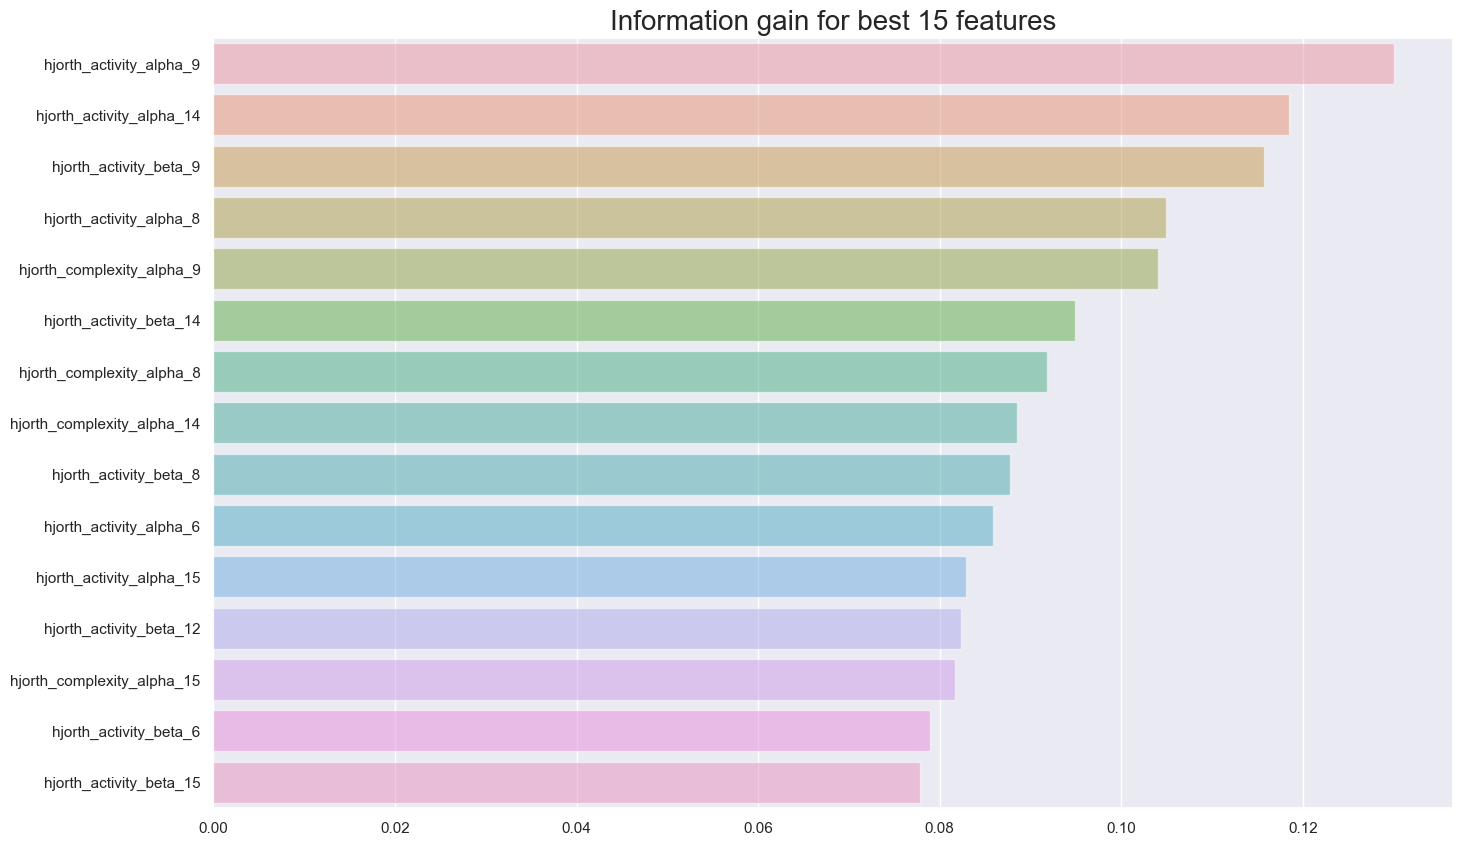

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
    
plt.grid()
sns.set(style='darkgrid')
plt.grid()
sns.barplot(x=mutual_info_series.values[:15], y=mutual_info_series.index[:15], alpha=0.5)

plt.title(f'Information gain for best 15 features', fontdict = {'fontsize' : 20})
plt.savefig(f'data/plots/information_gain/ig_best_15.png', dpi = 300)